# Unabomber. Statistical analyses (see paper section 4.5)

L. Verreyen

O. van der Burgh

P. Claes


Following Nini (2017), we used the Multidimensional Analysis Tagger (Nini 2016) for analyzing Ted Kaczynski's manifestos. This tagger was applied to the folder containing the chunks (size 1500) of the manifestos of Ted Kaczynski. The tagger outputs a couple of statistics files, of which we analyzed one. This contains frequencies for 67 linguistic features that are described in the manual (Nini 2016). These linguistic features are expressed in the frequency per 100 tokens. We then also added the average sentence length per file, which is not expressed per 100 tokens, but for the entire document (chunk). 

We perform statistical analyses on the manifestos from 1995 and 2016, as it became clear from the previous analyses (VNC, PCA, HAC, and qualitative) that 1995 and 2010 are largely the same manifesto, with only some minor differences. Therefore, we reasoned that it is useful to compare the two manifestos (1995 and 2016) on the linguistic features that were proven to be indicative of the threatening or defaming character of a forensic text (Nini 2017). 

In addition, we performed correlation tests on the PCA coordinates.



---

- Nini, A. (2015) Multidimensional Analysis Tagger 1.3 - Manual. Available at: https://sites.google.com/site/multidimensionaltagger/.
- Nini, A. (2017). Register variation in malicious forensic texts. *International Journal of Speech, Language & the Law, 24*(1), 99-126.

### Table of contents

1. Preprocessing
2. Exploratory Analysis
      - 2.1. Testing for normality
      - 2.2. Difference in central tendency: Mann-Whitney U test
3. Statistical analysis
      - 3.1. Interpretation
4. Visualization
5. Correlation tests with coordinates of Principal Component Analysis

# 1. Preprocessing

In [ ]:
df <- read.csv("/Users/Documents/dta/CLS/CLS_final/chunks_1500/chunks_1500_stats.csv")

In [ ]:
df$texts <- NULL
df$years <- NULL

In [ ]:
tail(df)

,Filename,year,Tokens,AWL,TTR,AMP,ANDC,BEMA,BYPA,CAUS,⋯,VPRT,WHCL,WHOBJ,WHQU,WHSUB,WZPAST,WZPRES,XX0,Unnamed..69,Average_sentence_length
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
81,2010_manifesto-17,2010,1501,5.01,550,0.13,0.33,2.13,0.07,0.20,⋯,4.66,0.00,0.00,0.00,0.20,0.27,0.07,0.73,NA,21.74
82,2016_manifesto-28,2016,1503,4.97,568,0.27,0.67,1.86,0.07,0.27,⋯,3.53,0.13,0.00,0.00,0.13,0.27,0.13,0.73,NA,25.00
83,2016_manifesto-38,2016,1500,5.30,559,0.27,1.20,1.93,0.00,0.00,⋯,3.67,0.13,0.13,0.07,0.20,0.13,0.13,0.60,NA,24.59
84,2010_manifesto-6,2010,1503,4.67,540,0.40,0.53,2.59,0.33,0.13,⋯,7.65,0.00,0.13,0.00,0.13,0.13,0.20,1.26,NA,22.40
85,1995_manifesto-14,1995,1502,5.03,557,0.20,0.47,1.93,0.20,0.40,⋯,6.06,0.07,0.13,0.00,0.07,0.27,0.13,0.80,NA,25.86
86,2016_manifesto-17,2016,1505,5.15,502,0.20,0.47,1.66,0.07,0.53,⋯,5.91,0.00,0.00,0.07,0.07,0.07,0.07,0.73,NA,30.00


In [ ]:
#manifestos <- df[df$Type == "manifesto", ]

In [ ]:
str(df$year)

 int [1:86] 1995 2016 2010 2010 1995 1995 2016 2016 2016 1995 ...


# 2. Exploratory analysis


According to Nini (2017) are statistically significant in distinction "threatening" vs. "defaming" in forensic texts: 
- PRMD: Preditive modals (will & shall)
- SPP2: second person pron
- FPP1: first person pron
- AWL: average word length
- TPP3: third person pronoun
- JJ: attributive adjectives
-  PEAS: perfect aspect
- THVC: that as verb complement
- VBD: past tense

We add to that: 
- TTR: Type token ratio
- average sentence length
- COND: Conditional adverbial subordinators
- CONC: Concessive adverbial subordinators

First, we will check the frequencies of the listed linguistic variables for normality (`shapiro.test()`). As the majority of these are not normally distributed, we use a Mann-Whitney U)-test (`wilcox.test`) to determine the (significant) differences in central tendency between **1995 and 2016 manifesto**. The variables that are significantly different in central tendency will be added to a GLM binomial.

## 2.1. Testing for normality
Check to see if variables are normally distributed using `shapiro.test`. 

We look for a p-value **HIGHER** than 0.05. If it is higher than 0.05 => normally distributed. If lower => not normally distributed

In [ ]:
# select dataframe with only 1995 and 2016
df_1995_2016 <- df[df$year != 2010, ]

In [ ]:
# PRMD
# not normally distributed
shapiro.test(df_1995_2016$PRMD)


	Shapiro-Wilk normality test

data:  df_1995_2016$PRMD
W = 0.93109, p-value = 0.00123


In [ ]:
# FPP1
# not normally distributed
shapiro.test(df_1995_2016$FPP1)


	Shapiro-Wilk normality test

data:  df_1995_2016$FPP1
W = 0.87721, p-value = 9.326e-06


In [ ]:
# SPP2
# not normally distributed
shapiro.test(df_1995_2016$SPP2)


	Shapiro-Wilk normality test

data:  df_1995_2016$SPP2
W = 0.63871, p-value = 1.804e-11


In [ ]:
# TPP3
# not normally distributed
shapiro.test(df_1995_2016$TPP3)


	Shapiro-Wilk normality test

data:  df_1995_2016$TPP3
W = 0.95067, p-value = 0.01061


In [ ]:
# AWL
# NORMALLY DISTRIBUTED
shapiro.test(df_1995_2016$AWL)


	Shapiro-Wilk normality test

data:  df_1995_2016$AWL
W = 0.98674, p-value = 0.7064


In [ ]:
#JJ (attributive adjectives)
# not normally distributed
shapiro.test(df_1995_2016$JJ)


	Shapiro-Wilk normality test

data:  df_1995_2016$JJ
W = 0.96087, p-value = 0.03579


In [ ]:
# THVC (that as verb complement)
# not normally distributed
shapiro.test(df_1995_2016$THVC)


	Shapiro-Wilk normality test

data:  df_1995_2016$THVC
W = 0.94798, p-value = 0.007782


In [ ]:
# PEAS (perfect aspect)
# not normally distributed
shapiro.test(df_1995_2016$PEAS)


	Shapiro-Wilk normality test

data:  df_1995_2016$PEAS
W = 0.95765, p-value = 0.02425


In [ ]:
# VBD (past tense)
# not normally distributed
shapiro.test(df_1995_2016$VBD)


	Shapiro-Wilk normality test

data:  df_1995_2016$VBD
W = 0.87776, p-value = 9.748e-06


In [ ]:
# TTR (type token ratio)
# NORMALLY DISTRIBUTED
shapiro.test(df_1995_2016$TTR)


	Shapiro-Wilk normality test

data:  df_1995_2016$TTR
W = 0.98166, p-value = 0.4365


In [ ]:
# Average sentence length
# NORMALLY DISTRIBUTED
shapiro.test(df_1995_2016$Average_sentence_length)


	Shapiro-Wilk normality test

data:  df_1995_2016$Average_sentence_length
W = 0.98168, p-value = 0.4376


In [ ]:
# COND (conditional adverbial subordinators)
# not normally distributed
shapiro.test(df_1995_2016$COND)


	Shapiro-Wilk normality test

data:  df_1995_2016$COND
W = 0.95272, p-value = 0.01349


In [ ]:
# CONC (concessive adverbial subordinators)
# not normally distributed
shapiro.test(df_1995_2016$CONC)


	Shapiro-Wilk normality test

data:  df_1995_2016$CONC
W = 0.8223, p-value = 1.873e-07


## 2.2. Difference in central tendency: Mann-Whitney U test

In [ ]:
# select dataframe with only 1995 and 2016
df_1995_2016 <- df[df$year != 2010, ]
head(df_1995_2016)

,Filename,year,Tokens,AWL,TTR,AMP,ANDC,BEMA,BYPA,CAUS,⋯,VPRT,WHCL,WHOBJ,WHQU,WHSUB,WZPAST,WZPRES,XX0,Unnamed..69,Average_sentence_length
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1,1995_manifesto-11,1995,1500,5.14,573,0.27,0.40,1.07,0.33,0.07,⋯,5.60,0.07,0.07,0.07,0.00,0.27,0.00,0.67,NA,21.43
2,2016_manifesto-12,2016,1501,5.06,549,0.47,0.80,1.67,0.07,0.00,⋯,5.46,0.07,0.00,0.00,0.07,0.07,0.07,0.53,NA,28.85
5,1995_manifesto-18,1995,1501,5.08,541,0.20,0.60,1.80,0.07,0.60,⋯,5.86,0.13,0.00,0.00,0.13,0.13,0.13,0.53,NA,20.83
6,1995_manifesto-2,1995,1506,4.95,536,0.27,0.40,2.32,0.13,0.46,⋯,7.50,0.00,0.13,0.00,0.07,0.13,0.07,1.73,NA,20.83
7,2016_manifesto-24,2016,1492,5.14,583,0.07,0.60,2.14,0.00,0.34,⋯,4.22,0.20,0.07,0.00,0.47,0.20,0.20,0.67,NA,27.27
8,2016_manifesto-34,2016,1490,5.01,535,0.07,0.67,1.81,0.13,0.20,⋯,2.95,0.00,0.07,0.00,0.13,0.20,0.07,0.94,NA,23.44


In [ ]:
df_1995_2016$year <- factor(df_1995_2016$year)


In [ ]:
# check if factorization worked
str(df_1995_2016$year)

 Factor w/ 2 levels "1995","2016": 1 2 1 1 2 2 2 1 1 2 ...


### TTR: type token ratio


In [ ]:
wilcox.test(df_1995_2016$TTR~df_1995_2016$year)

Warning message in wilcox.test.default(x = c(573, 541, 536, 565, 543, 551, 560, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df_1995_2016$TTR by df_1995_2016$year
W = 219.5, p-value = 0.0003284
alternative hypothesis: true location shift is not equal to 0


> p-value < 0.05 --> statistically significant difference in central tendency

### PRMD: Predictive modals (will, shall, ...)

In [ ]:
wilcox.test(df_1995_2016$PRMD~df_1995_2016$year)

Warning message in wilcox.test.default(x = c(1, 1.47, 0.27, 1.2, 0.73, 1.66, 0.8, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df_1995_2016$PRMD by df_1995_2016$year
W = 436, p-value = 0.518
alternative hypothesis: true location shift is not equal to 0


> P-value > 0.05 --> no statistically significnat difference in means

### SPP2: Second person pronouns

In [ ]:
wilcox.test(df_1995_2016$SPP2~df_1995_2016$year)

Warning message in wilcox.test.default(x = c(0.07, 0.27, 0, 0.27, 0.07, 0.46, 0, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df_1995_2016$SPP2 by df_1995_2016$year
W = 579, p-value = 0.1522
alternative hypothesis: true location shift is not equal to 0


> p-value > 0.05 --> not statistically significant difference in means in frequency of second person pronouns

### FPP1: first person pronouns

In [ ]:
wilcox.test(df_1995_2016$FPP1~df_1995_2016$year)

Warning message in wilcox.test.default(x = c(0.67, 0.93, 0.86, 0.4, 1, 0.2, 2.33, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df_1995_2016$FPP1 by df_1995_2016$year
W = 629.5, p-value = 0.04841
alternative hypothesis: true location shift is not equal to 0


> P-value < 0.05 --> slightly statistically significant difference in means of frequency of first person pronouns

### AWL: Average word length

In [ ]:
wilcox.test(df_1995_2016$AWL~df_1995_2016$year)

Warning message in wilcox.test.default(x = c(5.14, 5.08, 4.95, 5, 4.91, 5.01, 5.09, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df_1995_2016$AWL by df_1995_2016$year
W = 228.5, p-value = 0.0005204
alternative hypothesis: true location shift is not equal to 0


> p-value < 0.05 --> significant difference in means in average word length 

### TPP3: Third person pronouns

In [ ]:
wilcox.test(df_1995_2016$TPP3~df_1995_2016$year)

Warning message in wilcox.test.default(x = c(2.73, 2.13, 4.58, 3.06, 4.59, 1.39, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df_1995_2016$TPP3 by df_1995_2016$year
W = 705, p-value = 0.0027
alternative hypothesis: true location shift is not equal to 0


> p-value < 0.05 --> statistically significant difference in means

### JJ: attributive adjectives

In [ ]:
wilcox.test(df_1995_2016$JJ~df_1995_2016$year)

Warning message in wilcox.test.default(x = c(8.6, 9.06, 9.69, 9.91, 9.51, 10.03, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df_1995_2016$JJ by df_1995_2016$year
W = 451, p-value = 0.6584
alternative hypothesis: true location shift is not equal to 0


> p-value > 0.05 --> not statistically significant

### PEAS: Perfect Aspect

In [ ]:
wilcox.test(df_1995_2016$PEAS~df_1995_2016$year)

Warning message in wilcox.test.default(x = c(0.4, 0.27, 0.27, 0.8, 0.6, 0.13, 0.87, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df_1995_2016$PEAS by df_1995_2016$year
W = 352.5, p-value = 0.07411
alternative hypothesis: true location shift is not equal to 0


> p-value > 0.05 --> not statistically significant

### THVC: That as verb complement

In [ ]:
wilcox.test(df_1995_2016$THVC~df_1995_2016$year)

Warning message in wilcox.test.default(x = c(0.27, 0.6, 0.6, 0.2, 0.4, 0.2, 0.73, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df_1995_2016$THVC by df_1995_2016$year
W = 362.5, p-value = 0.09784
alternative hypothesis: true location shift is not equal to 0


> p-value > 0.05 --> not statistically significant

### VBD: Past tense

In [ ]:
wilcox.test(df_1995_2016$VBD~df_1995_2016$year)

Warning message in wilcox.test.default(x = c(1.27, 0.6, 0.33, 2.13, 1, 0.93, 0.2, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df_1995_2016$VBD by df_1995_2016$year
W = 227, p-value = 0.0004826
alternative hypothesis: true location shift is not equal to 0


> p-value < 0.05 --> statistically significant

### ASL: Average sentence length

In [ ]:
wilcox.test(df_1995_2016$Average_sentence_length~df_1995_2016$year)

Warning message in wilcox.test.default(x = c(21.43, 20.83, 20.83, 21.13, 21.74, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df_1995_2016$Average_sentence_length by df_1995_2016$year
W = 227.5, p-value = 0.0004929
alternative hypothesis: true location shift is not equal to 0


> p-value < 0.05 --> statistically significant

### COND: Conditionals

In [ ]:
wilcox.test(df_1995_2016$COND~df_1995_2016$year)

Warning message in wilcox.test.default(x = c(0.27, 0.73, 0.6, 0.33, 0.8, 0.53, 0.27, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df_1995_2016$COND by df_1995_2016$year
W = 592.5, p-value = 0.1402
alternative hypothesis: true location shift is not equal to 0


> p-value > 0.05 --> not statistically significant

### CONC: Concessives

In [ ]:
wilcox.test(df_1995_2016$CONC~df_1995_2016$year)

Warning message in wilcox.test.default(x = c(0, 0, 0, 0, 0.2, 0, 0.07, 0, 0, 0.07, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df_1995_2016$CONC by df_1995_2016$year
W = 277.5, p-value = 0.002785
alternative hypothesis: true location shift is not equal to 0


> p-value < 0.05 --> statistically significant

# 3. Statistical analysis
Because 1995 and 2010 are practically the same  manifesto, with some minor changes, we choose to run a binomial generalized linear model on 2016 vs. "1995". 

In [ ]:
# loading modules
library(lme4)
library(car)
library(effects)

Loading required package: Matrix

Loading required package: carData

Registered S3 methods overwritten by 'car':
  method                          from
  influence.merMod                lme4
  cooks.distance.influence.merMod lme4
  dfbeta.influence.merMod         lme4
  dfbetas.influence.merMod        lme4

lattice theme set by effectsTheme()
See ?effectsTheme for details.



In [ ]:
df <- read.csv("/Users/Documents/dta/CLS/CLS_final/chunks_1500/chunks_1500_stats.csv")
df$texts <- NULL
df$years <- NULL
head(df)

,Filename,year,Tokens,AWL,TTR,AMP,ANDC,BEMA,BYPA,CAUS,⋯,VPRT,WHCL,WHOBJ,WHQU,WHSUB,WZPAST,WZPRES,XX0,Unnamed..69,Average_sentence_length
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1,1995_manifesto-11,1995,1500,5.14,573,0.27,0.4,1.07,0.33,0.07,⋯,5.60,0.07,0.07,0.07,0.00,0.27,0.00,0.67,NA,21.43
2,2016_manifesto-12,2016,1501,5.06,549,0.47,0.8,1.67,0.07,0.00,⋯,5.46,0.07,0.00,0.00,0.07,0.07,0.07,0.53,NA,28.85
3,2010_manifesto-12,2010,1501,5.11,574,0.20,0.6,1.93,0.20,0.20,⋯,6.26,0.07,0.00,0.00,0.20,0.00,0.20,0.47,NA,22.39
4,2010_manifesto-3,2010,1506,4.89,557,0.13,0.6,1.93,0.07,0.27,⋯,6.44,0.00,0.13,0.00,0.13,0.00,0.20,1.13,NA,21.74
5,1995_manifesto-18,1995,1501,5.08,541,0.20,0.6,1.80,0.07,0.60,⋯,5.86,0.13,0.00,0.00,0.13,0.13,0.13,0.53,NA,20.83
6,1995_manifesto-2,1995,1506,4.95,536,0.27,0.4,2.32,0.13,0.46,⋯,7.50,0.00,0.13,0.00,0.07,0.13,0.07,1.73,NA,20.83


In [ ]:
# create factor with 2 levels : 2016 and not-2016
df_1995_2016 <- df[df$year != 2010, ]
df_1995_2016$year <- as.factor(df_1995_2016$year)

# make sure that 1995 is reference level for the models
df_1995_2016$year <- relevel(df_1995_2016$year, ref='1995')
str(df_1995_2016$year)

 Factor w/ 2 levels "1995","2016": 1 2 1 1 2 2 2 1 1 2 ...


In [ ]:
#(df_1995_2016)

In [ ]:
# define glm model
model <- glm(year ~ TTR + FPP1 + AWL + TPP3 + VBD + Average_sentence_length + CONC, 
             data = df_1995_2016, family = binomial)

# inspect the directions of the correlations
summary(model)


Call:
glm(formula = year ~ TTR + FPP1 + AWL + TPP3 + VBD + Average_sentence_length + 
    CONC, family = binomial, data = df_1995_2016)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.60160  -0.13967   0.00738   0.11076   1.71136  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)  
(Intercept)             -94.50467   40.29391  -2.345   0.0190 *
TTR                       0.04156    0.02633   1.578   0.1145  
FPP1                      1.33900    1.49226   0.897   0.3696  
AWL                      11.60261    6.29830   1.842   0.0654 .
TPP3                     -2.11695    1.03517  -2.045   0.0409 *
VBD                       2.23863    0.89297   2.507   0.0122 *
Average_sentence_length   0.50342    0.25189   1.999   0.0457 *
CONC                     28.47368   15.31548   1.859   0.0630 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 84.

In [ ]:
# checking for overdispersion ==> no overdispersion
20.46/58 <= 1.4

[1] TRUE

In [ ]:
# inspect directions of correlations
summary(model)$coef

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-94.50467268,40.29391069,-2.3453835,0.01900752
TTR,0.04156127,0.02633048,1.5784472,0.11446292
FPP1,1.33900006,1.49226203,0.8972955,0.36956124
AWL,11.60261071,6.29830215,1.8421807,0.06544872
TPP3,-2.11694828,1.03517461,-2.0450156,0.04085332
VBD,2.23863076,0.89297040,2.5069485,0.01217785
Average_sentence_length,0.50342425,0.25188943,1.9985922,0.04565250
CONC,28.47367961,15.31548037,1.8591437,0.06300677


In [ ]:
# check drop1 to see which predictors are significant
drop1(model, test="LR")

,Df,Deviance,AIC,LRT,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,20.46008,36.46008,NA,NA
TTR,1,23.52243,37.52243,3.0623469,0.0801258639
FPP1,1,21.32705,35.32705,0.8669679,0.3517961046
AWL,1,26.15829,40.15829,5.6982063,0.0169822595
TPP3,1,28.58392,42.58392,8.1238403,0.0043686920
VBD,1,34.66402,48.66402,14.2039357,0.0001640271
Average_sentence_length,1,27.02159,41.02159,6.5615053,0.0104208181
CONC,1,26.07887,40.07887,5.6187914,0.0177688986


In [ ]:
# inspect directions of correlations
summary(model)$coef

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-94.50467268,40.29391069,-2.3453835,0.01900752
TTR,0.04156127,0.02633048,1.5784472,0.11446292
FPP1,1.33900006,1.49226203,0.8972955,0.36956124
AWL,11.60261071,6.29830215,1.8421807,0.06544872
TPP3,-2.11694828,1.03517461,-2.0450156,0.04085332
VBD,2.23863076,0.89297040,2.5069485,0.01217785
Average_sentence_length,0.50342425,0.25188943,1.9985922,0.04565250
CONC,28.47367961,15.31548037,1.8591437,0.06300677


In [ ]:
# check Anova to see which predictors are significant
Anova(model, type="III", test.statistic="LR")

,LR Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
TTR,3.0623469,1,0.0801258639
FPP1,0.8669679,1,0.3517961046
AWL,5.6982063,1,0.0169822595
TPP3,8.1238403,1,0.0043686920
VBD,14.2039357,1,0.0001640271
Average_sentence_length,6.5615053,1,0.0104208181
CONC,5.6187914,1,0.0177688986


## 3.1. Interpretation

Reference level = 1995

#### Significant predictors: 
- AWL: Average word length
- TPP3: Third person pronouns
- VBD: past tense use 
- Average sentence length
- CONC: concessives

> **AWL (average word length)**: significant positive correlation: manifesto 2016 has a significantly higher average word length than 1995 --> **2016 more defaming**

> **TPP3 (Third person pronouns)**: significant negative correlation: manifesto 2016 uses significantly fewer third person pronouns than 1995 --> **2016 more threatening, 1995 more defaming**

> **VBD (past tense use)**: significant positive correlation: manifesto 2016 uses significantly more past tense than manifesto 1995 --> **more defaming**

> **Average sentence length**: significant positive correlation: manifesto 2016 has a significantly higher average sentence length than 1995 ==> **more nuance?**

> **CONC (concessive adverbial subordinators**: although, though): significant positve correlation: manifesto 2016 has a significantly higher amount of concessives than 1995 manifesto. ==> more nuance?

# 4. Visualization

## Average word length

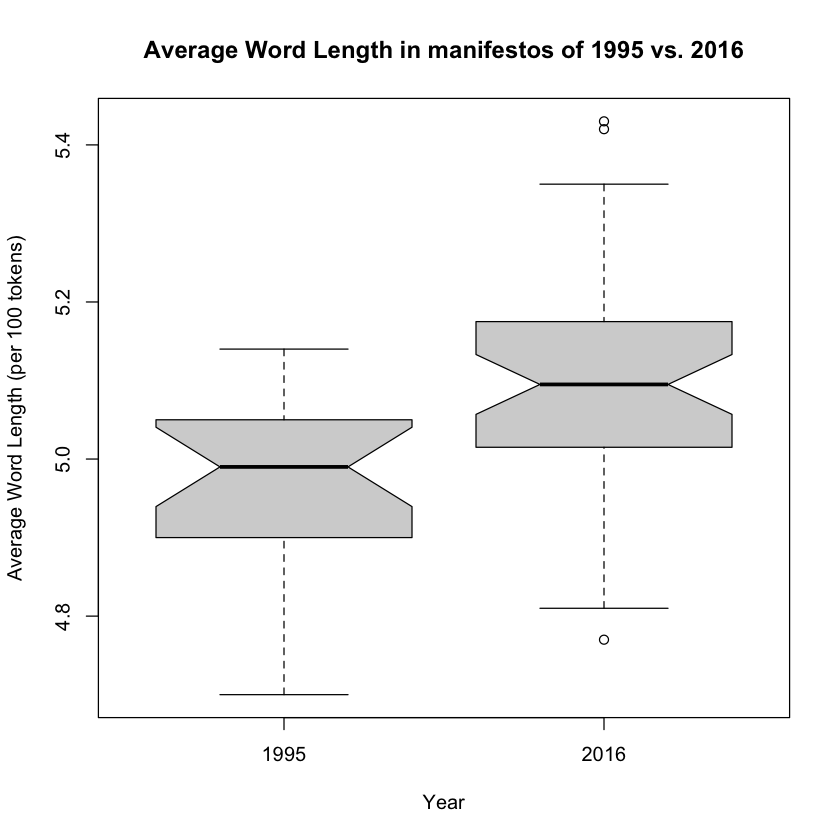

In [ ]:
# Average word length
boxplot(df_1995_2016$AWL~df_1995_2016$year, notch=TRUE, 
       main = "Average Word Length in manifestos of 1995 vs. 2016", 
       xlab = "Year", 
       ylab = "Average Word Length (per 100 tokens)")

## Third person pronouns

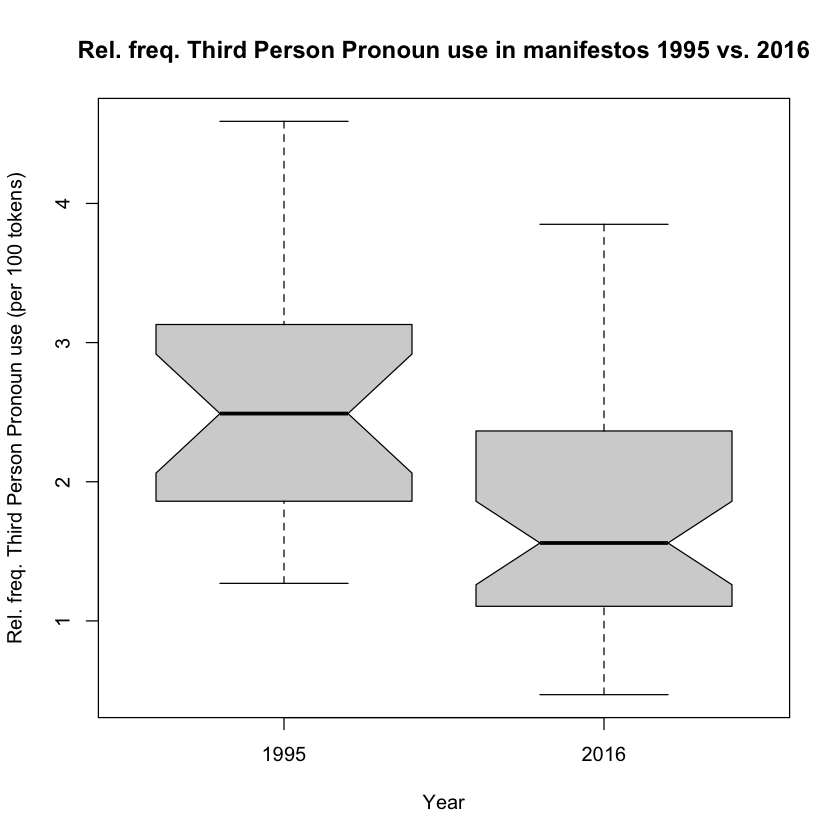

In [ ]:
# Third person pronouns
boxplot(df_1995_2016$TPP3~df_1995_2016$year, notch=TRUE, 
       main = "Rel. freq. Third Person Pronoun use in manifestos 1995 vs. 2016", 
       xlab = "Year", 
       ylab = "Rel. freq. Third Person Pronoun use (per 100 tokens)")

## Past tense

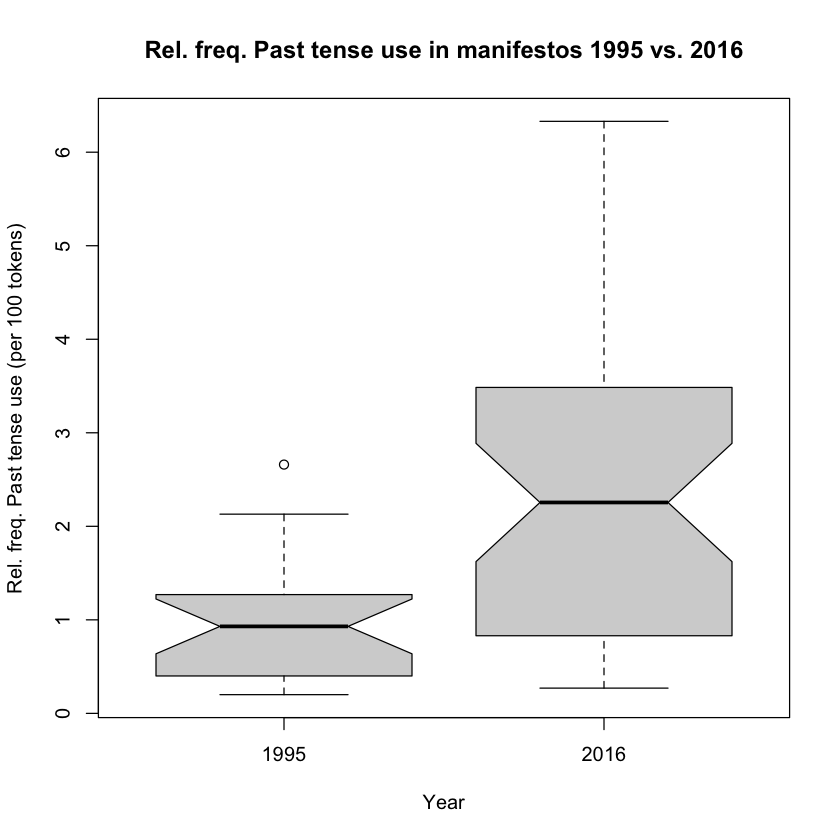

In [ ]:
# Past tense
boxplot(df_1995_2016$VBD~df_1995_2016$year, notch=TRUE, 
       main = "Rel. freq. Past tense use in manifestos 1995 vs. 2016", 
       xlab = "Year", 
       ylab = "Rel. freq. Past tense use (per 100 tokens)")

## Average sentence length

Warning message in bxp(list(stats = structure(c(20.27, 21.43, 22.06, 24.19, 28.3, :
“some notches went outside hinges ('box'): maybe set notch=FALSE”


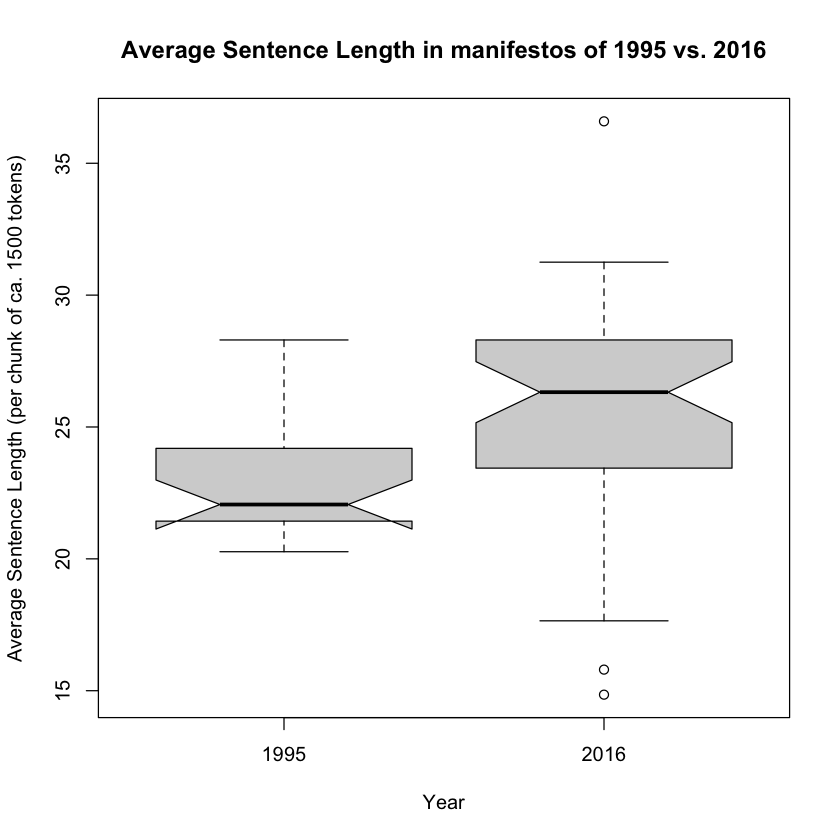

In [ ]:
# Average sentence length
boxplot(df_1995_2016$Average_sentence_length~df_1995_2016$year, notch=TRUE, 
       main = "Average Sentence Length in manifestos of 1995 vs. 2016", 
       xlab = "Year", 
       ylab = "Average Sentence Length (per chunk of ca. 1500 tokens)")

### Concessive adjverbial subordinators

Warning message in bxp(list(stats = structure(c(0, 0, 0, 0.07, 0.13, 0, 0, 0.07, :
“some notches went outside hinges ('box'): maybe set notch=FALSE”


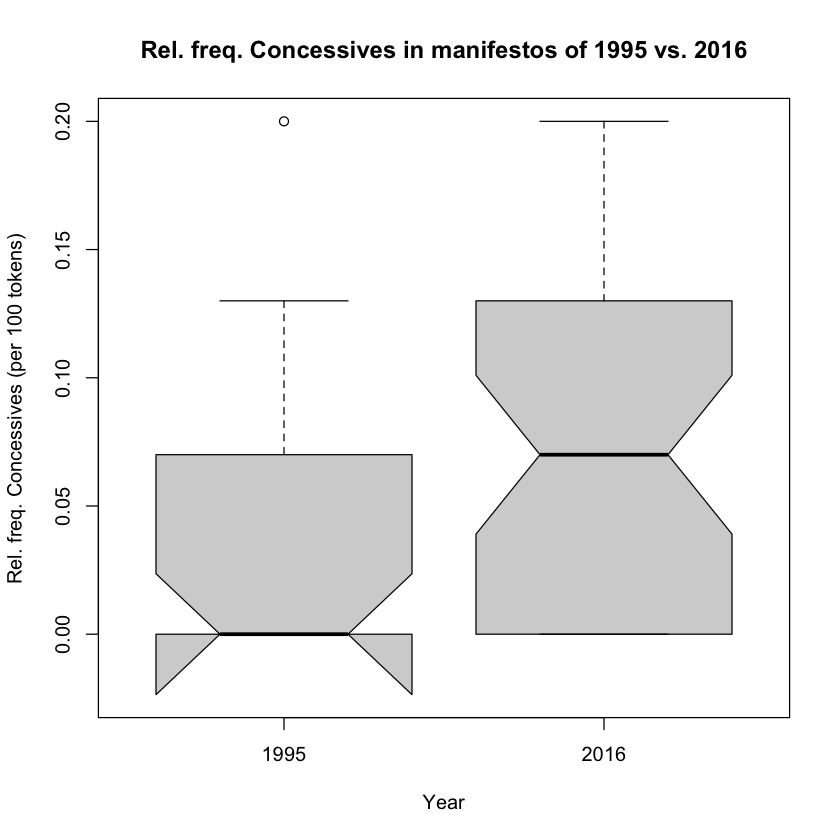

In [ ]:
boxplot(df_1995_2016$CONC~df_1995_2016$year, notch=TRUE, 
       main = "Rel. freq. Concessives in manifestos of 1995 vs. 2016", 
       xlab = "Year", 
       ylab = "Rel. freq. Concessives (per 100 tokens)")

# 5. Correlation tests with coordinates of Principal Component Analysis

## 5.1. 1995 vs. 2010

In [ ]:
df <- read.csv("/Users/Documents/dta/CLS/CLS_final/pca_df_coordinates_1995_2010.csv")
head(df)

,X,x1,x2,years
,<int>,<dbl>,<dbl>,<int>
1,0,-0.008235160,-0.030277874,1995
2,1,-0.020330735,-0.004016512,1995
3,2,-0.026307222,-0.008748106,1995
4,3,-0.003341547,-0.005830725,1995
5,4,-0.016739221,0.002962745,1995
6,5,-0.033560206,-0.013028223,1995


In [ ]:
# check for normality

shapiro.test(df$x1)
shapiro.test(df$x2)
shapiro.test(df$years)

# Not all of our variables are normally distributed, so we cannot compute Pearson's r.
# Instead we proceed with Kendall's tau. 


	Shapiro-Wilk normality test

data:  df$x1
W = 0.94069, p-value = 0.03021



	Shapiro-Wilk normality test

data:  df$x2
W = 0.96156, p-value = 0.1679



	Shapiro-Wilk normality test

data:  df$years
W = 0.63631, p-value = 5.802e-09


In [ ]:
cor.test(df$x1, df$years, method="kendall", exact=FALSE)

# There is a correlation between the x1 coordinate and the year in which the manifesto was published,
# but this correlation is not significant.


	Kendall's rank correlation tau

data:  df$x1 and df$years
z = 0.3274, p-value = 0.7434
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
0.04224209 


In [ ]:
cor.test(df$x2, df$years, method="kendall", exact=FALSE)

# There is a correlation between the x2 coordinate and the year in which the manifesto was published,
# but this correlation is not significant.


	Kendall's rank correlation tau

data:  df$x2 and df$years
z = 0.17629, p-value = 0.8601
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
0.02274574 


## 5.2. 1995 vs. 2016


In [ ]:
df <- read.csv("/Users/Documents/dta/CLS/CLS_final/pca_df_coordinates_1995_2016.csv")
head(df)

,X,x1,x2,years
,<int>,<dbl>,<dbl>,<int>
1,0,-0.03696046,-0.005317137,1995
2,1,-0.03014649,-0.021547047,1995
3,2,-0.03355145,-0.023704811,1995
4,3,-0.01124485,-0.007671736,1995
5,4,-0.01903012,-0.019137159,1995
6,5,-0.04052628,-0.027779455,1995


In [ ]:
# check for normality

shapiro.test(df$x1)
shapiro.test(df$x2)
shapiro.test(df$years)

# None of our variables are normally distributed, so we cannot compute Pearson's r.
# Instead we proceed with Kendall's tau. 


	Shapiro-Wilk normality test

data:  df$x1
W = 0.95303, p-value = 0.01399



	Shapiro-Wilk normality test

data:  df$x2
W = 0.95005, p-value = 0.009872



	Shapiro-Wilk normality test

data:  df$years
W = 0.59485, p-value = 3.262e-12


In [ ]:
cor.test(df$x1, df$years, method="kendall", exact=FALSE)

# There is a significant correlation between the x1 coordinate and the year in which the manifesto was published.


	Kendall's rank correlation tau

data:  df$x1 and df$years
z = 5.3185, p-value = 1.046e-07
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.5426945 


In [ ]:
cor.test(df$x2, df$years, method="kendall", exact=FALSE)

# There is a correlation between the x2 coordinate and the year in which the manifesto was published,
# but this correlation is not significant.


	Kendall's rank correlation tau

data:  df$x2 and df$years
z = 1.5235, p-value = 0.1276
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.1554521 
